### **Question 1**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA

numpy is used to load the dataset csv. skiprows are used to skip the first row which only contains headers

In [9]:
data = np.loadtxt('PADL-Q1.csv',delimiter=',',skiprows=1)


the variance of every feature is printed before applying PCA. this is done to ensure that the total variance before PCA is the same after PCA. Also knowing the variance of every feature is crucial to be able to determine the miniumum number of dimensions that we can get reduced into after PCA. Because if the chosen minumum prinicpal componenets contain the features that have the most varience, then the other principal components can be neglected as most the features with most variance are already included in the preceeding principal components. The variance is calculated using numpy.

In [11]:
totVar = 0
for i, dim in enumerate(('first','second','third','fourth','fifth')):
  var = np.var(data[:,i])
  totVar+=var
  print('variance for the {0} dimension'.format(dim))
  print('var = {0}\n\n'.format(var))

print("totVar=", totVar)

variance for the first dimension
var = 2.048653995434412


variance for the second dimension
var = 8.039105393081824


variance for the third dimension
var = 17.885689822024325


variance for the fourth dimension
var = 32.314479829829196


variance for the fifth dimension
var = 54.41702008103843


totVar= 114.70494912140819


PCA is first initialized with number of components equal to our number of features, then it is fitted to our data to compute the principal components of our dataset. Each principal component has its eigenvalues which is the amount of variance that every principal component capture. the fit_transform function is used to create a new dataset which resembles the original dataset when projected into the new principal components

In [12]:
pca = PCA(n_components=5)
pca.fit(data)
newData = pca.fit_transform(data)

After applying PCA and getting the new dataset with the new principal components. the value of the variance of every principal component and the total variance of all components is calculated, to make sure that the new dataset total variance is equal to the original dataset total variance, but now the variance is concenterated in the beginning principal components.

In [13]:
totVar = 0
for i, dim in enumerate(('first','second','third','fourth','fifth')):
  var = np.var(newData[:,i])
  totVar+=var
  print('sample variance for the {0} dimension'.format(dim))
  print('var = {0}\n\n'.format(var))

print("totVar=", totVar)

sample variance for the first dimension
var = 61.76434650173085


sample variance for the second dimension
var = 34.48928083288869


sample variance for the third dimension
var = 11.772455728127955


sample variance for the fourth dimension
var = 5.283110268309786


sample variance for the fifth dimension
var = 1.3957557903509359


totVar= 114.7049491214082


The explained variance ratio is the percentage of the variance of each prinicipal component divided by the total variance. this is crucial in order to determine the minumum needed number of dimensions that wont result in little or no information loss.

In [6]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.53846279 0.30067823 0.1026325  0.04605826 0.01216823]


to determine the minimum number of dimensions, loadings of every feature in each principal component is plotted, the loadings is used to interpret how much each feature contribute each principal components. As seen by the plots, the first three principal components, the features with most variance contribute most to them.

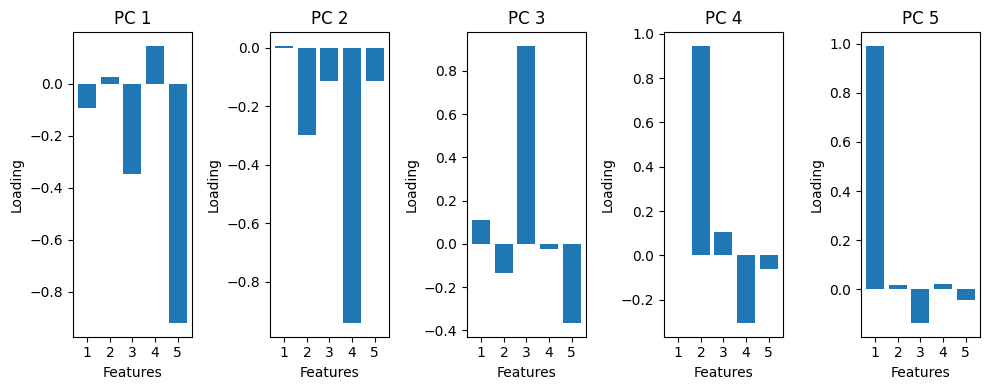

In [7]:
loadings = pca.components_
num_pc = len(pca.explained_variance_ratio_)
num_features = data.shape[1]
plt.figure(figsize=(10, 4))
for i in range(num_pc):
    plt.subplot(1, num_pc, i + 1)
    plt.bar(np.arange(num_features), loadings[i])
    plt.title(f'PC {i + 1}')
    plt.xlabel('Features')
    plt.ylabel('Loading')
    plt.xticks(np.arange(num_features), labels=np.arange(1, num_features + 1))
plt.tight_layout()
plt.show()

The mininum number of dimensions was chosen to be 3, this is because the first 3 principal contain approximatly 95% of the total variance based on the explained variance ratio calculation, which will result in very low loss in information. Also by interpreting the loadings plot, it can be seen that the features with most variance has a very strong influence and correlation with the first 3 principal components. Moreover, 95% is commonly used as variance coverage thereshold, and the first 3 components have nearly 95% of the total variance of all features. Taking only the first 3 principal components will result in a very little information loss, however it save us alot because the dimensions are reduced from 5 to 3 which is really helpful.

In [8]:
pca = PCA(n_components=3)
pca.fit(data)
minData = pca.fit_transform(data)

first, the explained variance of the principal components is extracted, the explained variance is the ratio of the variance in the component by the total variance in all components. np.argsort returns the indexes of the in an order that would make the array sorted. the array of principal components is sorted based on their value of explained variance. slicing is used to reverse the array as the default argsort return the array sorted in ascending order. After that, a loop that literates over the sorted indexes array is constructed, a variable to store the parts of each equation for every index is initialized. then each feature in the original dataset is literated over to get its coefficients from the principal component that its iterating over. Then the coeifficient and the index of the feature is added to the parts. finally, the parts that we got is iterated over to print the equations.

In [9]:

sorted_indices = np.argsort(pca.explained_variance_)[::-1]

for i in sorted_indices:
    print(f"Principal Component {i+1}:")
    parts = []
    for j in range(data.shape[1]):
        coefficient = pca.components_[i, j]
        parts.append((coefficient, j + 1))
    for part in parts:
        print(f"{part[0]} * x{part[1]}", end=" ")
        if part != parts[-1]:
            print("+", end=" ")
    print("\n")

Principal Component 1:
-0.09281878980481824 * x1 + 0.025271864878144812 * x2 + -0.3487698084971414 * x3 + 0.14508262540371697 * x4 + -0.9208999172502852 * x5 

Principal Component 2:
0.005623623398806438 * x1 + -0.298704634907195 * x2 + -0.11422130504512426 * x3 + -0.9406225721091186 * x4 + -0.11369514614723963 * x5 

Principal Component 3:
0.11266752492394691 * x1 + -0.13315621955233634 * x2 + 0.9142030225981608 * x3 + -0.023934285672261336 * x4 + -0.3650142921363313 * x5 



### **Question 2**

In [1]:
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
import numpy as np
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  PolynomialFeatures , FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import SplineTransformer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt





loading the data by using numpy, as the data is in csv file we use ',' as delimeter and we skip the first row which is the header

In [2]:
data = np.loadtxt('PADL-Q2-train.csv',delimiter=',',skiprows=1)


a number of basis functions was considered that are got by creating new variables from existing features that we have, these new variables are non linear functions to the original ones.  polynomial regression is tried to try to fit the data to a polynomial of different degrees. we used (2,3), as we have only 80 datapoints, degrees more than 3 was not used as it will lead to so much overfitting where the model memorizes and not learn, also as only linear regression is used without regularization so using degree more than 3 will make it prone to overfitting, sin and cos functions was tried as basis functions to try to capture the non linear patterns and oscillations as when plotting the features and target values, the data shows alot of up and down patterns oscillating. exp was tried as a basis function to model exponential inclines or declines in the data. Because the different features in the training data, we have alot of ranges, log1p is used to compress these values and to capture non linear relationships. Data scaling and normalization was experimented with by having 5 versions of training data, a normal one with no scaling or normalization, a one by using standard scaling that removes the mean and scale to the unit varience. Min Max scaling was tried that scale the feature to a range from 0 to 1, and normalizing the data to having a unit norm was tried. When looking at the values of the features in the dataset, Scaling and normalization can be seen as a good idea because of the different ranges and scales every feature have, without scaling and normalization, some features can have dominance on other features. Using normalization and scaling restrain this. All of the models are evaluated using cross validation because of the small number of datapoints, so to ensure that the models are tested and trained on everything, cross validation is used instead of the regular training and testing split.

we evaluate all the models by first having a loop pver the basis functions selected, then we have an inner loop for the different scaling and normalizing techniques that is chosen. Then make_pipeline is used to pipeline the basis function of the current index in the outer loop and the dataset of the index of the inner loop with a linear regression model. Then the different folds of the data created by using the K-fold cross validation technique is looped over and trained on the training part of this split and then evaluated on the testing part. the error metric used is r2.

In [4]:
X = data[:, :-1]
y = data[:, -1]

normalize_transformer = FunctionTransformer(normalize, validate=True)

minmax_scale_pipeline = make_pipeline(MinMaxScaler(), StandardScaler())
minmax_normalize_pipeline = make_pipeline(MinMaxScaler(), normalize_transformer)
scale_normalize_pipeline = make_pipeline(StandardScaler(), normalize_transformer)

datasets = [
    ('regular', None),  # No scaling
    ('min_max', MinMaxScaler()),  # Min-Max Scaling
    ('standard', StandardScaler()),  # Standard Scaling
    ('normalize', normalize_transformer),  # Normalization
    ('minmax_scale', minmax_scale_pipeline),  # Min-Max Scaling followed by Standard Scaling
    ('minmax_normalize', minmax_normalize_pipeline),  # Min-Max Scaling followed by Normalization
    ('standard_normalize', scale_normalize_pipeline)        # Standard Scaling followed by Normalization
    ]
datasets_names = ['Regular Dataset', 'Min Max Dataset', 'Standard Scaler', 'Normalize Dataset', 'MinMax and Scale Dataset', 'MinMax and Normalize Dataset', 'Standard Scaling with Normalize dataset']


basis_functions = [
    PolynomialFeatures(2, interaction_only=True, include_bias=False),
    PolynomialFeatures(3, interaction_only=True, include_bias=False),
    FunctionTransformer(np.sin, validate=True),
    FunctionTransformer(np.cos, validate=True),
    FunctionTransformer(np.exp, validate=True),
    FunctionTransformer(np.log1p, validate=True),
]

best_r2 = -9999
best_comb = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Evaluating Linear Regression with different basis functions and scaling/normalization techniques\n")

for function in basis_functions:

    print("Using basis functions", function ,"\n\n")
    for j, (name, dataset) in enumerate(datasets):
        print(f"Using: {datasets_names[j]} with {function}")


        if dataset is None:
            pipeline = make_pipeline(function, LinearRegression())
        else:
            pipeline = make_pipeline(function, dataset, LinearRegression())

        scores = []

        for train, test in kf.split(X):
            X_train, X_test = X[train], X[test]
            y_train, y_test = y[train], y[test]

            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            scores.append(r2)

        mean_r2 = np.mean(scores)
        print(f"Mean R²: {mean_r2}\n")

Evaluating Linear Regression with different basis functions and scaling/normalization techniques

Using basis functions PolynomialFeatures(include_bias=False, interaction_only=True) 


Using: Regular Dataset with PolynomialFeatures(include_bias=False, interaction_only=True)
Mean R²: 0.10331581007811526

Using: Min Max Dataset with PolynomialFeatures(include_bias=False, interaction_only=True)
Mean R²: 0.10331581007810917

Using: Standard Scaler with PolynomialFeatures(include_bias=False, interaction_only=True)
Mean R²: 0.10331581007810772

Using: Normalize Dataset with PolynomialFeatures(include_bias=False, interaction_only=True)
Mean R²: -0.12300917381211492

Using: MinMax and Scale Dataset with PolynomialFeatures(include_bias=False, interaction_only=True)
Mean R²: 0.10331581007810811

Using: MinMax and Normalize Dataset with PolynomialFeatures(include_bias=False, interaction_only=True)
Mean R²: 0.1433456963304534

Using: Standard Scaling with Normalize dataset with PolynomialFeatures(




Linear Regression , Ridge Regression and Lasso Regression is all tried and evaluated on the same data. For Ridge and Lasso Regression, different regularization alphas was tried and the best one was picked using the built in cross validation. Piecewise regression is used to fit seperate linear models to different segments in the data because its hard to have only single functions that is able to predict all Y, so having more for every segment a model is appropiate as each model only models and predicts its segment, segments are divided using the breakpoints. Spline transformation was also tried by bolting different segments polynomial fits and connecting them in knots to fit non linear relationships. Cubic spline is the most common type of spline transformation as it is smooth enough and it balance between flexability and smoothness. the parameters of the piecewise regression was chosen based on the graph of the target value that shows a high rise in values of y after the data point number 70, thats why the breakpoint is set to 70, the slopes are based also on the trend before the breakpoint and after. The parameters had to be chosen this way and not optimised as there is unsufficient data to have a good optimized parameters as we have only 80 data point so its unable to estimate the parameters correctly. piecewise regression seperate the data into two segments according to the conditions, and then every segment is fitted to it a different model. the piecewise was built using numpy funcion piecewise that take the conditions specified and the functions to construct piecewise. the spline transformation transformation was done by using the function of SplineTransformer of skilearn. the number of knots was chosen to be 2 because we have only 80 datapoints so 2 is more than enough.

To train and evaluate all the models, all the models where looped over and initialized. then each model was tried in 3 versions, separtely, with piecewise, and with spline transformation. and each model was evaluated using cross validation K-fold technique.

In [5]:
def piecewise_linear(x):

    return np.piecewise(x, [x < 70, x >= 70], [lambda x: 0.9 *x + 0.8 - 0.9* 70, lambda x:-0.5 * x + 0.8 - (-0.5*70 )])

In [6]:
X = data[:, :-1]
y = data[:, -1]

myalphas = np.logspace(-5, 6, 13)

models = [LinearRegression, RidgeCV, LassoCV]
model_names = ['Linear Regression', 'Ridge Regression using CV', 'Lasso Regression using CV']


basis_functions = [
    None,
    SplineTransformer(degree=3, n_knots=2, include_bias=False),
    FunctionTransformer(piecewise_linear, validate=True)
]

best_r2 = -9999
best_comb = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, model in enumerate(models):
    print('\n\n Using Regression of type: ', model_names[i], "\n")

    if model == LinearRegression:
        reg = model()

    elif model == RidgeCV:
        print('Trying These Alpha values ', myalphas, "\n")
        reg = model(alphas=myalphas)

    else:
        print('Trying These Alpha values ', myalphas, "\n")
        reg = model(alphas=myalphas, max_iter=1000000)




    for function in basis_functions:

      if (function is None):
        pipeline = reg

      else:

        pipeline = make_pipeline(function, reg)

      scores = []

      for train, test in kf.split(X):
          X_train, X_test = X[train], X[test]
          y_train, y_test = y[train], y[test]

          pipeline.fit(X_train, y_train)
          y_pred = pipeline.predict(X_test)
          r2 = r2_score(y_test, y_pred)
          scores.append(r2)

      print(function)
      print(scores)
      print(np.mean(scores), "\n")






 Using Regression of type:  Linear Regression 

None
[-0.4802532598443363, 0.24215777831107954, 0.4053486530798138, 0.3252333270572627, 0.33431444096985863]
0.16536018791473567 

SplineTransformer(include_bias=False, n_knots=2)
[-0.2625754582266462, 0.3106901433591447, 0.448447734839571, 0.4016785122806167, 0.3570713664656]
0.2510624597436572 

FunctionTransformer(func=<function piecewise_linear at 0x7afbce887010>,
                    validate=True)
[-0.3184603013171079, 0.2938553546676246, 0.38329754659927984, 0.28657448789894446, 0.3752670089567921]
0.20410681936110658 



 Using Regression of type:  Ridge Regression using CV 

Trying These Alpha values  [1.00000000e-05 8.25404185e-05 6.81292069e-04 5.62341325e-03
 4.64158883e-02 3.83118685e-01 3.16227766e+00 2.61015722e+01
 2.15443469e+02 1.77827941e+03 1.46779927e+04 1.21152766e+05
 1.00000000e+06] 

None
[-0.48650408001583645, 0.24364814657437417, 0.40883663836645023, 0.2957630022390425, 0.3471895436354342]
0.16178665015989294 


an automated procedure that trains all the models in the above 2 tasks and evaluate them were implemented, and at the end the model with best r2 is outputted. the models are trained and evaluated using cross validation with kfolds = 5, as we have unsufficient data to be able to do train and test split. the problem with cross validation is that it under estimates the model performance, outputting performance metrics worse than its actual performance, but it helps with overfitting as it trains and tests the models on different subsets of the data, so giving a reliable performance estimates. all the models implemented in the last 2 tasks were trained and tested on the same data to ensure a fair choosing procedure of the model. All different models including Linear regression and models with regularization were built, Linear regression models were pipelined with basis functions and data scaling/ normalizing techniques, and also with piecewise regression and spline transformation, every version was trained and evaluated by cross validation. Models such as Ridge and Lasso regression were tried with piecewise, spline transformation, then trained and evaluated using Cross validation. every model's r2 value on the testing fold of the cross validation was recorded. at the end the model architecture that led to the best r2 value is outputted.

In [7]:
X = data[:, :-1]
y = data[:, -1]

myalphas = np.logspace(-5, 6, 13)


models = [LinearRegression, LinearRegression, RidgeCV, LassoCV]
model_names = ['Linear Regression task 1', 'Linear Regression task 2', 'Ridge Regression using CV', 'Lasso Regression using CV']


minMax = MinMaxScaler()
normaliser = Normalizer()
minMax_normaliser = make_pipeline(MinMaxScaler(), Normalizer())


datasets = [
    ('regular', None),  # No scaling
    ('min_max', MinMaxScaler()),  # Min-Max Scaling
    ('standard', StandardScaler()),  # Standard Scaling
    ('normalize', normalize_transformer),  # Normalization
    ('minmax_scale', minmax_scale_pipeline),  # Min-Max Scaling followed by Standard Scaling
    ('minmax_normalize', minmax_normalize_pipeline),  # Min-Max Scaling followed by Normalization
    ('standard_normalize', scale_normalize_pipeline)        # Standard Scaling followed by Normalization
    ]
datasets_names = ['Regular Dataset', 'Min Max Dataset', 'Standard Scaler', 'Normalize Dataset', 'MinMax and Scale Dataset', 'MinMax and Normalize Dataset', 'Standard Scaling with Normalize dataset']


basis_functions_task1 = [
    PolynomialFeatures(2, interaction_only=True, include_bias=False),
    PolynomialFeatures(3, interaction_only=True, include_bias=False),
    FunctionTransformer(np.sin, validate=True),
    FunctionTransformer(np.cos, validate=True),
    FunctionTransformer(np.exp, validate=True),
    FunctionTransformer(np.log1p, validate=True),
]


basis_functions_task2 = [
    None,
    SplineTransformer(degree=3, n_knots=2, include_bias=False),
    FunctionTransformer(piecewise_linear, validate=True)
]

best_r2 = -9999
best_comb = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, model in enumerate(models):

    if model_names[i] == 'Linear Regression task 1':
        for function in basis_functions_task1:
            for j, (name, dataset) in enumerate(datasets):

                # Create pipeline
                if dataset is None:
                    pipeline = make_pipeline(function, LinearRegression())
                else:
                    pipeline = make_pipeline(function, dataset, LinearRegression())

                scores = []

                for train, test in kf.split(X):
                    X_train, X_test = X[train], X[test]
                    y_train, y_test = y[train], y[test]

                    pipeline.fit(X_train, y_train)
                    y_pred = pipeline.predict(X_test)
                    r2 = r2_score(y_test, y_pred)
                    scores.append(r2)

                mean_r2 = np.mean(scores)

                if mean_r2 > best_r2:
                    best_r2 = mean_r2
                    best_comb = [model_names[i], datasets_names[j], function]
    else:
        if model == LinearRegression:
            reg = model()
        elif model == RidgeCV:
            reg = model(alphas=myalphas)
        else:
            reg = model(alphas=myalphas, max_iter=1000000)

        for function in basis_functions_task2:
            if function is None:
                pipeline = make_pipeline(reg)
            else:
                pipeline = make_pipeline(function, reg)

            scores = []

            for train, test in kf.split(X):
                X_train, X_test = X[train], X[test]
                y_train, y_test = y[train], y[test]

                pipeline.fit(X_train, y_train)
                y_pred = pipeline.predict(X_test)
                r2 = r2_score(y_test, y_pred)
                scores.append(r2)

            mean_r2 = np.mean(scores)

            if mean_r2 > best_r2:
                best_r2 = mean_r2
                best_comb = [model_names[i], function]

print("\nThe best combination of all models is:", best_comb, "with R² score of", best_r2)


The best combination of all models is: ['Linear Regression task 1', 'MinMax and Normalize Dataset', FunctionTransformer(func=<ufunc 'log1p'>, validate=True)] with R² score of 0.29172447125591094


based on the r2 scores got by using cross validation to evaluate all errors, the best model from the two previous tasks was a Linear Regression model, that had its data scaled using MinMax scaler, and then Normalized to make all the features have a unit norm. log1p was used as a basis function to introduce nonlinearity, and also to compress the data as all the features had different forms. The model was built by pipelining these steps using make_pipeline function, first log1p basis function was added, then the features were further scaled and normalized. and at last a linear regression model was fitted to it.

In [16]:
minMax_normaliser = make_pipeline(MinMaxScaler(), Normalizer())


final_model = make_pipeline(FunctionTransformer(np.log1p, validate=True),minMax_normaliser,LinearRegression())
final_model.fit(X,y)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<ufunc 'log1p'>, validate=True)),
                ('pipeline',
                 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                 ('normalizer', Normalizer())])),
                ('linearregression', LinearRegression())])

The file that contains the testing data is loaded the same way as we loaded the training data, the first row is skipped as it is just headers, and the delimiter is ',' as the dataset format is in csv. The X_unseen is all the data in the dataset except the target value. the y_unseen is the target value. The model predicts the test data, and then its prediction is compared to the actual values and the r2 is computed


In [17]:
test_data = np.loadtxt('PADL-Q2-unseen.csv',delimiter=',',skiprows=1)
X_unseen = test_data[:, :-1]
y_unseen = test_data[:, -1]

print(test_data[:5])



[[ 6.64774e+01  1.64950e+00  7.61300e-01  1.00000e-01 -2.09000e-02]
 [ 1.51422e+01  2.22920e+00  5.00000e-03  1.00000e-01  1.28100e-01]
 [ 8.79859e+01  2.14490e+00  2.21700e-01  1.00000e-01  1.28900e-01]
 [ 7.94979e+01  2.09010e+00  3.96000e-02  1.00000e-01  1.44200e-01]
 [ 3.65181e+01  2.09920e+00  2.04000e-01  0.00000e+00 -1.31000e-02]]


In [18]:
y_pred = final_model.predict(X_unseen)
r2 = r2_score(y_unseen,y_pred)


### **Question 3**

In [19]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Using api.load to load the glove-wiki-gigaword-100 pre-trained word2vec model. This specific model is chosen as this model is trained on million of words got from the Wikipedia corpus, this allows us to leverage precomputed word vectors and knowledge that we can fine tune to fit our model.

In [20]:
from gensim import downloader as api
model = api.load("glove-wiki-gigaword-100")




[==================================================] 100.0% 128.1/128.1MB downloaded


read_and_tokenize is a function that takes path of the text file, it then reads it into the variable text using file.read(), then a function from gensim.utils module is used that used to tokenize the text variable into a list of words or tokens which are all lower cased, also punctuations and non alphabetic characters are removed. Finally the tokens extracted are returned.

In [64]:
from gensim.utils import simple_preprocess
def read_and_tokenize(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        text = file.read()


    tokens = simple_preprocess(text)
    return tokens

tokens = read_and_tokenize('/content/sherlock_padl.txt')



A new word2vec model is intialized, the vector size is chosen as 100 as it has to match the vector size of the pretrained model. for the model, we make it scan through the list of tokens and create a vocabulary from the unique words. Then all the words present in the vocabulary of the pretrained model is extracted using model.key_to_index.keys and we have our model build its vocabulary on it, by having update as true we allow that the existing vocabulary is updated, if it was false it will create new ones. Vectors_lockf is an array that is in the training is used in controlling the rate of learning for every word vector, we set it into 1 to make all the word vectors having an equal locking factor of 1 making them 100% updatable. Then for the words that intersect with our vocabulary, we merge their word embeddings from the pretrained model to our new model using intersect_word2vec_format method. Lastly the model is again trained using the new dataset.

In [22]:
from gensim.models import Word2Vec
import numpy as np

new_model = Word2Vec(vector_size=100, min_count=1, epochs=40)
new_model.build_vocab([tokens])

total_examples = new_model.corpus_count

new_model.build_vocab([list(model.key_to_index.keys())], update=True)
new_model.wv.vectors_lockf = np.ones(len(new_model.wv))

new_model.wv.intersect_word2vec_format('~/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz', binary=False, lockf=1.0)

new_model.train([tokens],total_examples = total_examples,epochs = new_model.epochs)





(400000, 4173520)

triplets of words where the middle word is equal "and" is extracted, this is done by looping over the list of the tokens, except the last two tokens so we dont want to reach out of bounds, for every word, we see if the next index word is equal to "and", if yes, then this word, and the next word, and the word after it are added as a list to the list of triplets.

In [63]:
triplets=[]
for i in range(len(tokens)-2):
  if (tokens[i+1]=='and'):
    triplet = [tokens[i],tokens[i+1],tokens[i+2]]
    triplets.append(triplet)

print(triplets[:10])

[['states', 'and', 'most'], ['cost', 'and', 'with'], ['shut', 'and', 'locked'], ['bye', 'and', 'be'], ['eclipses', 'and', 'predominates'], ['emotions', 'and', 'that'], ['reasoning', 'and', 'observing'], ['gibe', 'and', 'sneer'], ['motives', 'and', 'actions'], ['delicate', 'and', 'finely']]


we have two functions, the first one takes a word, and then loop over the list of triplets, then for every triplet the last word in the triplet is extracted, and we test if this word share a suffix of length 3 with the word inputted, this is done by using endswith function, if the last word in the triplet share a suffix of length 3 with the inputted 3, then this triplet is appened to a list, at the end this list which contains all the triplets that their last word share a suffix of 3 with the inputted word is returned.

the second function is the same exactly but the last word in the triplets returned from this function just shares a suffix of length 2 with the inputted word.

the second function is constructed because most of the words in list L dont have more than 5 triplets that they share a suffix of length 3 with the last word. so this constaint was relaxed a bit to be able to extract a greater number of triplets.

if a word have more than 5 triplets that it share a suffix of length 3 with the last word. then the first function is used, else the second version of the function is used

In [24]:
def filter_triplets_3(word):
  result=[]
  for triplet in triplets:
    last = triplet[2]
    if (last.endswith(word[-3:])):
      result.append(triplet)

  return result

def filter_triplets_2(word):
  result=[]
  for triplet in triplets:
    last = triplet[2]
    if (last.endswith(word[-2:])):
      result.append(triplet)

  return result


for every word in the list L, the triplets that its last word share a suffix with the word in L are extracted and saved into a variable.

In [25]:
L = ['gold', 'diamond', 'robbery', 'bank', 'police']

gold_triplets = filter_triplets_2(L[0])
print(len(gold_triplets))

diamond_triplets = filter_triplets_2(L[1])
print(len(diamond_triplets))

robbery_triplets = filter_triplets_3(L[2])
print(len(robbery_triplets))

bank_triplets = filter_triplets_2(L[3])
print(len(bank_triplets))

police_triplets = filter_triplets_2(L[4])
print(len(police_triplets))


40
32
11
8
19


A function that take a list of triplets, then for every triplet, it extracts the first word and third word, and then compute the cosine similarity between the two word embeddings. the cosine similarity is the most common way of measuring the similarity between word vectors. then every triplet with the cosine similarity between the first and third word in the triplet is added to a list and this list is returned at the end when all the triplets are checked.

In [26]:
def triplets_similarity(triplets):

  triplets_sims = []

  for triplet in triplets:

    word1 = triplet[0]
    word3 = triplet[2]

    similarity = new_model.wv.similarity(word1,word3)
    triplets_sims.append([triplet,similarity])

  return triplets_sims



for the lists of triplets of every word in L, the similarity as explained above is calculated, then the built in function in python sorted is used which returns a sorted list from items in an iterable object, the key set like this to specify the element in which the sorting should be based on, the sorting should be based on the similarity score of every triplet, reverse is set to true to get it in descending order. finally, slicing is used to get the 5 triplets with the highest cosine similarity between their first word and third word. this is done for every triplets list for the words in the list L

In [27]:
gold_similarities = triplets_similarity(gold_triplets)
gold_sorted_similarities = sorted(gold_similarities, key=lambda x: x[1], reverse=True)


print(gold_sorted_similarities[:5])

[[['do', 'and', 'should'], 0.95110756], [['me', 'and', 'could'], 0.89954096], [['at', 'and', 'should'], 0.871415], [['you', 'and', 'would'], 0.86452085], [['matter', 'and', 'should'], 0.8320688]]


In [28]:
diamond_similarities = triplets_similarity(diamond_triplets)
diamond_sorted_similarities = sorted(diamond_similarities, key=lambda x: x[1], reverse=True)

print(diamond_sorted_similarities[:5])

[[['round', 'and', 'round'], 1.0000001], [['up', 'and', 'hand'], 0.90456086], [['up', 'and', 'found'], 0.84162414], [['up', 'and', 'found'], 0.84162414], [['good', 'and', 'kind'], 0.82882684]]


In [29]:
robbery_similarities = triplets_similarity(robbery_triplets)
robbery_sorted_similarities = sorted(robbery_similarities, key=lambda x: x[1], reverse=True)

print(robbery_sorted_similarities[:5])

[[['long', 'and', 'very'], 0.83531034], [['again', 'and', 'very'], 0.8121399], [['day', 'and', 'very'], 0.74541086], [['pay', 'and', 'very'], 0.6459847], [['ten', 'and', 'every'], 0.6184026]]


In [30]:
bank_similarities = triplets_similarity(bank_triplets)
bank_sorted_similarities = sorted(bank_similarities, key=lambda x: x[1], reverse=True)

print(bank_sorted_similarities[:5])

[[['me', 'and', 'think'], 0.83854896], [['done', 'and', 'think'], 0.8142789], [['loves', 'and', 'think'], 0.6173758], [['do', 'and', 'frank'], 0.38277626], [['handy', 'and', 'think'], 0.27069616]]


In [31]:
police_similarities = triplets_similarity(police_triplets)
police_sorted_similarities = sorted(police_similarities, key=lambda x: x[1], reverse=True)

print(police_sorted_similarities[:5])



[[['head', 'and', 'face'], 0.8196561], [['men', 'and', 'once'], 0.7118795], [['novel', 'and', 'romance'], 0.6675822], [['holmes', 'and', 'since'], 0.66330093], [['help', 'and', 'advice'], 0.59972864]]


### **Question 4**

In [32]:
import torch
import matplotlib

import torch.nn as nn
import torch.optim as optim

The architecture of the MLP used consist of 1 input layer which takes two numbers as input , then 4 hidden layers and lastly an output layer which delivers the output. The sizes of the layers can be seen as first being increased to try to form a more abstract representation at the beginning layers, after that the size of layers can be seen as decreasing to represent more the essential features that have an influence on our output. ReLU is used after every layer except the last one to introduce non-linearity into the model because it is very needed as multiplication is non linear.

The model is intialized at the end.

In [33]:
class MLP(nn.Module):

  def __init__(self):

    super(MLP,self).__init__()

    self.linear1 = nn.Linear(2,32)

    self.relu = nn.ReLU()

    self.linear2 = nn.Linear(32,64)

    self.linear3 = nn.Linear(64,128)

    self.linear4 = nn.Linear(128,64)

    self.linear5 = nn.Linear(64,32)

    self.linear6 = nn.Linear(32,1)


  def forward(self,x):

    x = self.linear1(x)

    x = self.relu(x)

    x = self.linear2(x)

    x = self.relu(x)

    x = self.linear3(x)

    x = self.relu(x)

    x = self.linear4(x)

    x = self.relu(x)

    x = self.linear5(x)

    x = self.relu(x)

    x = self.linear6(x)


    return x

model = MLP()

first a random seed is set that make sure that operation of generating random is determenistic, after that we generate the first half of our training data by using torch.rand to create a tensor of shape (1000,2) that contain random values from the range 0 to 1

then we construct the y data for this tensor by calculating the products of the two colummns for every row, unnsqueeze method is used to reshape the result into the format that pytorch expects.

the second part of the training data is constructed the same way as the first part, but the difference is values inside it lies in the range from 4 to 6.

torch.cat is used to concatenate the two tensors into one tensor which will be the training data for our model, this is done for both X data and y data.

finally the data is shuffled to make sure that the data is mixed well preventing any bias during training.

so our training data will have numbers from 0 to 1 and numbers from 4 to 6 only.

In [34]:
torch.manual_seed(42)
X_train1= torch.rand(1000, 2) * (1 - 0) + 0
y_train1 = (X_train1[:, 0] * X_train1[:, 1]).unsqueeze(1)
print(X_train1.min(),X_train1.max())


X_train2= torch.rand(1000, 2) * (6 - 4) + 4
y_train2 = (X_train2[:, 0] * X_train2[:, 1]).unsqueeze(1)
print(X_train2.min(),X_train2.max())


X_train = torch.cat((X_train1, X_train2), dim=0)
y_train = torch.cat((y_train1, y_train2), dim=0)


shuffle_idx = torch.randperm(X_train.shape[0])
X_train = X_train[shuffle_idx]
y_train = y_train[shuffle_idx]


tensor(0.0023) tensor(0.9998)
tensor(4.0035) tensor(5.9978)


the loss function that is used is Mean Squared Error, it is a very common loss function for regression, and its main benefit that it penalties more larger errors making the model more robust. Adam was used as an optimiser because it is an adaptive learning rate optimization algorithm which is based on the methodologies of momentum and root mean squared propagation, 0.001 is the common choice of learning rate for Adam.

for every epoch, the model generate predictions for the training dataset, then the loss is predicted between the predictions and the actual values, gradients are cleared so they dont accumulate, then the derivative of the loss with respect to the gradient is computed. then the optimzer updates the parameters based on the gradient and learning rate

In [35]:
epochs = 10000

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr= 0.001)
loss_history = []
for epoch in range(epochs):

  y_predict = model(X_train)

  loss = criterion(y_predict,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  loss_history.append(loss.item())
  if not epoch % 200:
      # Print out the loss every 10 iterations
      print('epoch {}, loss {}'.format(epoch, loss.item()))



epoch 0, loss 320.1007995605469
epoch 200, loss 0.47559601068496704
epoch 400, loss 0.0035390439443290234
epoch 600, loss 0.0016910844715312123
epoch 800, loss 0.0016486247768625617
epoch 1000, loss 0.0009045875631272793
epoch 1200, loss 0.0030194311402738094
epoch 1400, loss 0.005909999366849661
epoch 1600, loss 0.008242708630859852
epoch 1800, loss 0.01650049351155758
epoch 2000, loss 0.000759304384700954
epoch 2200, loss 0.0004904893576167524
epoch 2400, loss 0.0013759452849626541
epoch 2600, loss 0.0006948168156668544
epoch 2800, loss 0.001678749918937683
epoch 3000, loss 0.004197589121758938
epoch 3200, loss 0.003960526082664728
epoch 3400, loss 0.011280982755124569
epoch 3600, loss 0.024422256276011467
epoch 3800, loss 0.0008628114592283964
epoch 4000, loss 0.002226142445579171
epoch 4200, loss 0.0015328718582168221
epoch 4400, loss 0.0038772376719862223
epoch 4600, loss 0.0027228458784520626
epoch 4800, loss 0.000559029693249613
epoch 5000, loss 0.00041081561357714236
epoch 5200

random samples in range of the training data is generated. just like the training dataset, they are done the same way, the first half contains data from range 1 to 0 and their product result. the second half contain data from range from 4 to 6 and their target values, then the two halves are concatenated.

then we switch the model to evaluation mode, then we use torch.no_grad as during evaluation back propagation is not needed, then we predict our evaluation data, and we calculate the mean squared error between the predictions and the actual values.

In [36]:
torch.manual_seed(43)
X_eval1= torch.rand(500, 2) * (1 - 0) + 0
y_eval1 = (X_eval1[:, 0] * X_eval1[:, 1]).unsqueeze(1)

X_eval2= torch.rand(500, 2) * (6 - 4) + 4
y_eval2 = (X_eval2[:, 0] * X_eval2[:, 1]).unsqueeze(1)

X_eval = torch.cat((X_eval1, X_eval2), dim=0)
y_eval = torch.cat((y_eval1, y_eval2), dim=0)

model.eval()
with torch.no_grad():
    eval_predictions = model(X_eval)
    eval_error = torch.mean(torch.abs(eval_predictions - y_eval))


print(f"Mean Absolute Error on evaluation Data: {eval_error.item()}")



Mean Absolute Error on evaluation Data: 0.010153070092201233


Random samples outside the range of training data are constructed, the torch.rand is used to construct a tensor with shape (500,2) with values in the range of 1 to 3 with their product values. then we predict our test data, and calculate the mean squared error between the predictions and the actual values.



In [37]:
X_test = torch.rand(500, 2) * (3 - 1) + 1
print(X_test.min(),X_test.max())
y_test = (X_test[:, 0] * X_test[:, 1]).unsqueeze(1)
test_predictions = model(X_test)
test_error = torch.mean(torch.abs(test_predictions - y_test))
print(f"Mean Absolute Error on Test Data: {test_error.item()}")

tensor(1.0001) tensor(2.9965)
Mean Absolute Error on Test Data: 0.6018927693367004


### **Question 5**

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import os
import zipfile

zip_path = '/content/drive/My Drive/clocks_dataset.zip'
extract_path = '/content/clocks_dataset/train'

os.makedirs(extract_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [41]:
import torch
from torchvision import transforms
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import math
import matplotlib.pyplot as plt
from PIL import Image
from torch import tensor



Dataset from torch.utils is used to represent the dataset, we inherit it to define the clocks dataset, the constructer __init__ takes the directory which contains the data, and also the transformation that are applied to the data, image_files is initialized as an array of file paths in the directory that was inputted where these file paths ends with the extension of (.png) which represents the images extensions.
__len__ method returns the number of clocks images in the dataset.
method
getitem method takes an index as input, it extracts the path of image requested, and uses PIL.Image module to use this path to load the image, also a label path is constructed by replacing the extension of the image path with (.txt) to get the label of the corresponding image, the file from the label path is read and hours and minutes are extracted seperatly by spliting them by (:), then it creates a tensor from the hour and minutes values extracted.
If any transformation operations were provided, the images are transformed by it, then it returns the image and the tensor of the labels which have two dimensions for hours and minutes5.

In [42]:
class ClockDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        # Correctly name the attribute
        self.image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.png')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]  # Use the correct attribute name here
        label_path = img_path.replace('.png', '.txt')

        # Load image
        image = Image.open(img_path)

        # Load label
        with open(label_path, 'r') as file:
            label = file.readline().strip()
            hour, minute = map(int, label.split(':'))

        labels_tensor = tensor([hour, minute])

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, labels_tensor

First a sequence of transformations to be applied to the pictures is defined, the images are resized from dimensions (448,448) into (64,64), this is done because this big dimension is not really needed, because at the end the aim of the model is to learn the angle in which leads to every hour and minute, so to keep our network small and weights small, it was resized like that. then ToTensor transformation is used to first scale the pixel values into the range of 0 to 1, and then convert the images into tensors. ColorJitter transformation was also used to randomly change the brightness, contrast, saturation, and hue of the images to increase the generalising ability of the model and to help to fight overfitting. As we are working on a clock dataset, transformation such as random rotation or random horizontal flip wasnt used as it didnt make sense because the angles will be corrupted making it dont correspond to the label.

The dataset is initialized with the directory path and the transformations. Then random_split function was used to split the dataset into training, validation and testing sets. 75% of the data is used for training, 15% for validation, and the remainder for testing, these values are a very common split.


In [43]:
transform = transforms.Compose([


    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.ColorJitter(brightness=0.4, contrast=0.2, saturation=0.2, hue=0.1),

])

clock_dataset = ClockDataset(directory=extract_path, transform=transform)

total_no = len(clock_dataset)
train_size = int(0.75 * total_no)
val_size = int(0.15 * total_no)
test_size = total_no - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(clock_dataset, [train_size, val_size, test_size])
print(len(train_dataset), len(val_dataset),len(test_dataset))


7500 1500 1000


Dataloader for training, validation and testing are set up using Dataloader class.

In [44]:
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True, num_workers=1)
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=True, num_workers=1)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=True, num_workers=1)



A CNN is constructed, it is made up of 4 convolutional layers, convolutional layers are crucial to extract spatial features from every image, each layer is followed by a batch normalization to normalize the outputs of the layer to get better convergance, a ReLU function to introduce non linearity to allow the network to capture complicated patterns, a max pooling to reduce the spatial dimensions of the feature maps in order to make them invariant.
After the last covolutional layer, a dropout layer is used to prevent overfitting by dropping random units when training. Dropout is used after the batchnorm as according to academic papers, using dropout before batchnorm may lead into a problem called variance shift.

After the convolutional layers, the network is flattened to make the output of the convolutional layer be in the form to be given to the fully forward network, and then its inputted to a series of fully connected network layers, fully connected layers are used to reduce dimensionality so to be able to  focus on the most effective features. Between the fully connected layers, batch normalization and relu functions to normalize the outputs and to introduce non linearit.

two output layers are used, one for the hours that acts as the prediction of the hours, it has output size of 12 which correspond for the hours on the clock. the second one is for the minutes which have output size of 60 that correspond the number of minutes in an hour.

As this is treated as classification problem, cross entropy loss was used as a loss function as it is the most common loss function used for classification, it measures the difference between the predicted probability distribution and the actual probability distribution.

This problem was treated as a classification because of the problem nature, both predicted variables are discrete and finite, this limited space makes it easier and suitable to be treated as a classification problem more of a regression problem.

In [52]:
class CNN(nn.Module):
  def __init__(self):

    super(CNN, self).__init__()

    self.convlayers = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels=32, kernel_size = 3, stride =1, padding =1),
        # B x 32 x 64 x 64
        nn.BatchNorm2d(32),
        # B x 32 x 64 x 64
        nn.ReLU(),
        # B x 32 x 64 x 64
        nn.MaxPool2d(kernel_size = 2, stride = 2),
        # B x 32 x 32 x 32
        nn.Conv2d(in_channels = 32, out_channels=64, kernel_size = 3, stride =1, padding =1),
        # B x 64 x 32 x 32
        nn.BatchNorm2d(64),
        # B x 64 x 32 x 32
        nn.ReLU(),
        # B x 64 x 32 x 32
        nn.MaxPool2d(kernel_size=2,stride =2),
        # B x 64 x 16 x 16
        nn.Conv2d(in_channels = 64, out_channels = 128,kernel_size = 3,stride =1 , padding =1),
        # B x 128 x 16 x 16
        nn.BatchNorm2d(128),
        # B x 128 x 16 x 16
        nn.ReLU(),
        # B x 128 x 16 x 16
        nn.MaxPool2d(kernel_size=2,stride =2),
      # B x 128 x 8 x 8
        nn.Conv2d(in_channels = 128, out_channels = 256,kernel_size = 3,stride =1 , padding =1),
        # B x 256 x 8 x 8
        nn.BatchNorm2d(256),
        # B x 256 x 8 x 8
        nn.ReLU(),
        # B x 256 x 8 x 8
        nn.MaxPool2d(kernel_size=2,stride =2),
        # B x 256 x 4 x 4
        nn.Dropout(0.75)


    )

    self.fc1 = nn.Linear(in_features = 4 * 4 * 256, out_features = 1024)

    self.batch1 = nn.BatchNorm1d(1024)

    self.relu =  nn.ReLU()

    self.fc2 =  nn.Linear(in_features = 1024, out_features = 512)

    self.batch2 = nn.BatchNorm1d(512)

    self.dropout2 = nn.Dropout(0.25)

    self.fcHours = nn.Linear(in_features = 512, out_features= 12)

    self.fcMins = nn.Linear(in_features = 512, out_features = 60)

  def forward(self,x):

    x= self.convlayers(x)

    x = x.view(x.size(0), -1)

    x = self.fc1(x)

    x = self.batch1(x)

    x = self.relu(x)

    x = self.fc2(x)

    x = self.batch2(x)

    x = self.relu(x)

    x = self.dropout2(x)

    hours = self.fcHours(x)
    mins = self.fcMins(x)

    return hours, mins

model = CNN()
loss_func = nn.CrossEntropyLoss()




This is our training and validation loop. first we check if A GPU is available to be used, if yes then the model is used to be used with GPU. number of epochs is set to 45 as this balances between exploration but not to lead into overfitting which will result in the model memorizing the data not learning it. the optimizer was set as the Adam optimizer as it is the most commonly used in image classification, it also builds on the methodologies of momentum and RSMP which makes it take the best aspects of both and combine them to result in the adaptive learning rate optimization. For the training loop, we loop over the number of epochs specified earlier. we then have an inner loop with the images and labels from the train loader and we load them. the model predicts the current batch of images, the prediction is made up of 2 parts, hours prediction and minutes prediction. seperate losses for minutes and hours are calculated using the loss function. the loss values of both is then summed, and gradients are cleared before computing the gradients of the total loss,  then the parameters are updated based on these gradients. then the predictions of minutes and hours are extracted by selecting the class with highest probability outputted, they are compared to the actual labels. each epoch the training loss and accuracy is recorded.

for validation, the model is switched to evaluation mode, with no gradients being computed, the validation process is similar to the training process but with no parameters being updated as we want to evaluate the model peformance on unseen data. and after each epoch the validation loss and accuracy is recorded and updated.

In [53]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)

num_epochs = 45

optim = torch.optim.Adam(model.parameters(), lr = 0.01)
iterations_per_epoch = math.ceil(len(train_dataset)/100)
train_losses= []
val_losses = []
training_accuracies=[]
val_accuracies = []

for epoch in range(num_epochs):
  total_loss = 0
  correct = 0
  total = 0
  for images , labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    hours_label, minute_label = labels[:, 0], labels[:, 1]
    hour_output,mins_output = model(images)
    loss_hour = loss_func(hour_output,hours_label)
    loss_mins = loss_func(mins_output,minute_label)
    loss = loss_hour + loss_mins
    optim.zero_grad()
    loss.backward()
    optim.step()
    pred_hours = torch.argmax(hour_output, 1)
    pred_mins = torch.argmax(mins_output, 1)
    correct += ((pred_hours == hours_label) & (pred_mins == minute_label)).sum()
    total += float(labels.size(0))
    total_loss += loss*images.shape[0]
    if (i+1) % 100 == 0:
       print('Epoch [{}/{}], Iteration [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, iterations_per_epoch, loss.item()))

  train_losses.append(total_loss / len(train_dataset))
  training_accuracies.append((correct/total).cpu())
  print('Train accuracy over epoch {}: {:.4f}'.format(epoch+1,training_accuracies[-1]))

  correct = 0
  total = 0
  total_val_loss = 0
  model.eval()
  with torch.no_grad():
    for images, labels in val_loader:
      images, labels = images.to(device), labels.to(device)
      hours_label, minute_label = labels[:, 0], labels[:, 1]
      hour_output,mins_output = model(images)
      loss_hour = loss_func(hour_output,hours_label)
      loss_mins = loss_func(mins_output,minute_label)
      loss = loss_hour + loss_mins
      pred_hours = torch.argmax(hour_output, 1)
      pred_mins = torch.argmax(mins_output, 1)
      correct += ((pred_hours == hours_label) & (pred_mins == minute_label)).sum()
      total += float(labels.size(0))
      total_val_loss += loss*images.shape[0]
    val_accuracy = correct/total
  total_val_loss  /= len(val_dataset)
  val_losses.append(total_val_loss.item())
  model.train()
  val_accuracies.append(val_accuracy.cpu())
  print('val accuracy at epoch {}: {:.4f}'.format(epoch+1,val_accuracy),"\n")




cuda
Train accuracy over epoch 1: 0.0021
val accuracy at epoch 1: 0.0067 

Train accuracy over epoch 2: 0.0091
val accuracy at epoch 2: 0.0153 

Train accuracy over epoch 3: 0.0351
val accuracy at epoch 3: 0.0660 

Train accuracy over epoch 4: 0.0789
val accuracy at epoch 4: 0.1180 

Train accuracy over epoch 5: 0.1339
val accuracy at epoch 5: 0.1973 

Train accuracy over epoch 6: 0.1944
val accuracy at epoch 6: 0.2200 

Train accuracy over epoch 7: 0.2435
val accuracy at epoch 7: 0.3113 

Train accuracy over epoch 8: 0.2905
val accuracy at epoch 8: 0.3460 

Train accuracy over epoch 9: 0.3297
val accuracy at epoch 9: 0.3813 

Train accuracy over epoch 10: 0.3668
val accuracy at epoch 10: 0.4007 

Train accuracy over epoch 11: 0.4100
val accuracy at epoch 11: 0.4060 

Train accuracy over epoch 12: 0.4484
val accuracy at epoch 12: 0.4740 

Train accuracy over epoch 13: 0.4736
val accuracy at epoch 13: 0.4687 

Train accuracy over epoch 14: 0.4752
val accuracy at epoch 14: 0.5113 

Train

the training and validation losses curves are plotted, and also the classification accuracy is printed across epochs for training and validation. the loss and accuracy are converted from pytorch tensors into numpy arrays as matplotlib dont work with pytorch tensors, they cant be printed in this format. the training loss and classification accuracy is plotted in a red color, the validation loss and classification accuracy is plotten in the green color. the plot shows that there is a generalization error, it is shown in both loss and classification plots, but it is seen that its not great which can indicate that our model dont go to extreme overfitting, this is because of our choice of hyperparameters that balance between the power of the model and complexity, making the model have the power to be capable to capture non linear relationships and patterns, but without making it too complicated to lead into overfitting of the data that leads to memorizing the data rather than learning it. This generalization error shows that the training set didnt represent all the patterns that where shown in the validation set. The overfitting was tried to be fought by using batch normalization and dropout layers, which lead to not so much overfitting but still the model architecture and hyperparameters lead to this generalization error, however it is reasonably and can be seen as controlled. as seen, towards reaching the last epochs, the curves can be seen as reaching a plateau which justifies the number of epochs set that allow to model to effectivly capture and learn the patterns but without resulting in extreme overfitting. the near smoothiness of both curves shows that learning rate result in fast learning without causing instability.

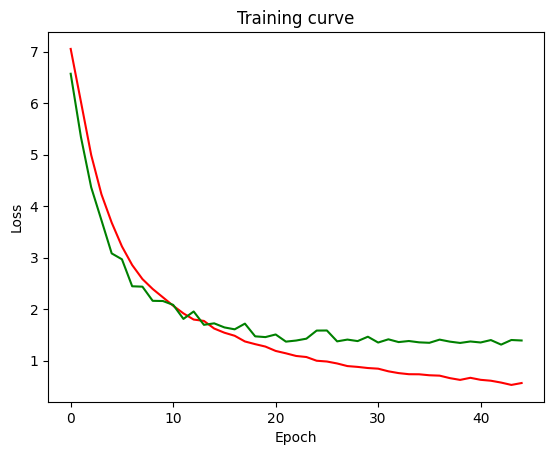

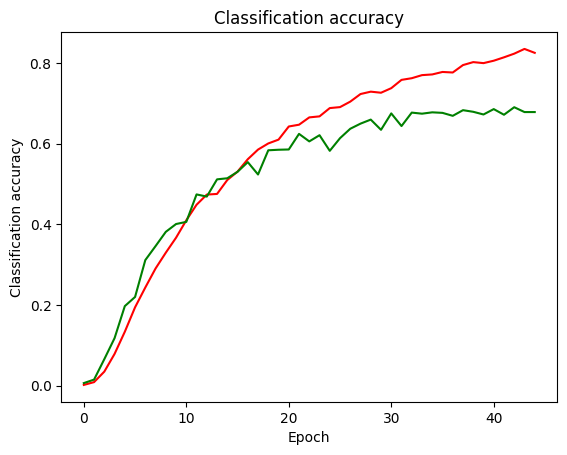

In [54]:
plt.title("Training curve")
plt.plot(range(len(train_losses)), [x.cpu().detach().numpy() if isinstance(x, torch.Tensor) else x for x in train_losses], 'r')
plt.plot(range(len(val_losses)), [x.cpu().numpy() if isinstance(x, torch.Tensor) else x for x in val_losses], 'g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.title("Classification accuracy")
plt.plot(range(len(training_accuracies)), [x.cpu().numpy() if isinstance(x, torch.Tensor) else x for x in training_accuracies], 'r')
plt.plot(range(len(val_accuracies)), [x.cpu().numpy() if isinstance(x, torch.Tensor) else x for x in val_accuracies], 'g')
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.show()

In [61]:
torch.save(model.state_dict(), 'model_weights_final.pkl')

In [62]:
def get_file_size(file_path):
    size_bytes = os.path.getsize(file_path)
    size_mib = size_bytes / (1024 * 1024)
    return size_mib

# Check the size of the saved model weights
weights_size = get_file_size('model_weights_final.pkl')
print(f"Model weights size: {weights_size:.2f} MiB")

Model weights size: 19.67 MiB


### **Question 6**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from torch import tensor

A clockdataset class is defined by inherriting Dataset, this inheritance requires implementing of len() and getitem() methods. first a constructer init is defined where the path of the directory and sequence of transformations is inputted, the constructer intializes the clockdataset with this directory and transformations, then a variable that holds a list of the images files paths in the directory is created, this list is a filtered list of file paths that ends with .png extension as this is the images extension. the len function returns the number of images files that were extracted. the getitem function takes the index of the requested item as an input, it then access the path of the requested image and uses Image module from PIL library to load it, if a sequence of transformations were supplied, the transformation is applied to the requested image and then the image is retured. this dataset only works with images as labels are not really needed as just images are generated its not a classification or regression problem.

In [ ]:
class ClockDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        # Correctly name the attribute
        self.image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.png')]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]  # Use the correct attribute name here

        image = Image.open(img_path)


        if self.transform:
            image = self.transform(image)

        return image

the transformations sequence is defined, with photos being resized from dimensions (448,448) to (64,64), this is done to help with the complexity of the model and number of weights, also photos with this dimensions are clear enough and indicative of the features of the clocks. ToTensor transformation is used to first scale the pixel values into the range of 0 to 1, and then convert the images into tensors. the training dataset is initialized with the path of the directory which holds the images files and with the sequence of transformations. only a training set is needed as GANs are an unsupervised models, so there is not right answers or labels to validate against.

In [ ]:
transform = transforms.Compose([


    transforms.Resize((64,64)),
    transforms.ToTensor(),


])

clock_dataset = ClockDataset(directory=extract_path, transform=transform)



print(len(clock_dataset))


10000


Dataloader for training is set up using Dataloader class with batchsize set to 100 that is the size of the batch got from the dataset during training. at every epoch the data is shuffled to not make the model used to a particular order. then the device is set to use a GPU if it is avaiable.

In [ ]:
train_loader = DataLoader(clock_dataset, batch_size=100, shuffle=True, num_workers=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

nz is the size of the input given to the generator, the input is a randomly sampled vector from the latent space, its size is chosen as 100 as its big enough to make the generator able to learn the mappings without having too much computational cost and higher values may cause overfitting . ngf is the size of the feature maps in the generator architecture. ndf is the size of the feature maps in the discriminator architecture, these were chosen this sizes it provide enough feature maps to be able to generate images with details and distinguish between real and fake, but with keepimg the complexity and cost of the model low. number of epochs specify how long will the the network train, it is set to 60 to balance between learning the patterns and capturing it but without leading to overfitting. lr is the learning rate for both the generator optimizer and the discriminator optimizer. it is set to 0.0002 as its not high that will lead the training to be unpredictable and diverge, and its not too low to make the convergence speed very slow and maybe result in getting stuck in local minimas, also this is the learning rate that was used in DCGAN architecture that proved it works well. beta1 controls the exponential decay rate for the moving average of the gradients in Adam optimizers, a low value is chosen to make Adam adapts more quickly to the changes that happens in the training.

In [ ]:
batch_size = 100
nz = 100 # Size of z latent vector (i.e. size of generator input)
ngf = 128 # Size of feature maps in generator
ndf = 128 # Size of feature maps in discriminator
num_epochs = 60 # Number of training epochs
lr = 0.0002 # Learning rate for optimizers
beta1 = 0.5 # Beta1 hyperparam for Adam optimizers

the generator architecture is defined, the first layer is a transposed convolutional layer which takes an input of size nz which is the size of the latent vector. transposed convolutional layer is used to increase the spatial dimension, stride is set to 1 to ensure there is nothing skipped because every detail is important at the initial layer. batch normalization is used to normalize the output of the convolutional layer to help with the training, ReLU is used to introduce non linearity to the model in order to capture non linear patterns. the first layer expands the input into a higher dimensional space to upsample it and increase the dimensions of the feature maps. In the next  convolutional layers, the number of outputs are decreased as the aim is to keep the relevant details. also the stride is increased to 2 this result in doubling of the spatial dimensions as this is a transposed convolutional layer. After the last convolutional layer, tanh is used to scale the pixels intensity to a range of 1 to -1. generator is then initialized.

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # input is Z of size B x nz x 1 x 1, we put this directly into a transposed convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf * 4, ngf*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf*2),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),

            nn.ConvTranspose2d( ngf, 3, 4, 2, 1, bias=False),

            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

netG = Generator()
netG = netG.to(device)

Discriminator is a CNN that does binary classification to classify images to real or fake, the discriminator architecture are made up of multiple convolutional layers that downsample the input image which is made up of 3 channels because it is an RGB image, this is done to extract the essential features to be able to diffrenciate between real and fake. in the first layer the stride is set to 2 to decrese the spatial dimensions by half as this is a regular convolutinal layer. the rest of the convultional layers doubles its input to increase the complexity of the model and its ability to capture complicated features. the stride is set to two also in the rest of the layers to continue in downsampling and reducing the spatial dimensions. following every convolutinal layer, there is a batch normalisation layer and leaky ReLU, batch normalization is used to normalize the layers outputs and also to fight overfitting in order to have a stable training process, LeakyReLU is used to introduce non-linearity, the difference between leakyReLU and ReLU is that the negative values of the gradients are allowed to leak, this ensures that there is no waste in gradient's information. the output of the last convolutional layer is in 1 dimensions which represents the probability whether this image is real or fake, the sigmoid is used to map the output to the range of 0 and 1 to represent the probability.

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(

            nn.Conv2d(3, ndf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x)

netD = Discriminator()
netD = netD.to(device)

 Binary Cross Entropy loss is used as the criterion to measure the the difference between the probability distribution of the labels predicted by the discriminator and the probability distributions of the actual labels. BCE is choosen as it the most commonly used criterion in binary classification tasks. then the convention for real and fake labels during training is established, then optimizers for both generator and discriminator with the learning rate and beta specified earlier are initialized, then the training loop starts with iterating over every epochs, and for every image in the train loader, the gradients are first cleared out, the discriminator training is started, then the batch for images and labels is formatted, then the real images are passed into the discriminator, the loss is then calculated between the output and the true labels, then the gradient of this error is computed, then fake data is generated using the generator and passed into the discriminator, the loss is computed between the predicted and the actuals, and gradient of this loss is backpropagated. after computing the two losses for real and fake images, the losses are summed and the model is updated based on the gradient.

 the generator training then begins, the generator is updated twice with each discriminator update to balance the power between the discriminator and generator in the training process to stablize the training and make sure that both components are learning effectively without one network dominating the other. first the gradients of the generator are cleared, then new fake pictures are generated by the generator, then the discriminator is given these fake images but with real labels to fool it. the loss is computed betwene the prediction of discriminator and actuals, then the loss is backpropagated to the generator to update its weights,

In [ ]:
criterion = nn.BCELoss()

real_label = 1.
fake_label = 0.

optimizerD = optim.Adam(netD.parameters(),lr = lr, betas =(beta1,0.999))
optimizerG = optim.Adam(netG.parameters(),lr =lr, betas =(beta1,0.999))

print("Starting Training Loop...")

for epoch in range(num_epochs):

  for i, images in enumerate(train_loader,0):

    netD.zero_grad()

    real_images = images.to(device)
    label = torch.full((batch_size,),real_label, dtype = torch.float, device = device)

    output = netD(real_images).view(-1)

    errD_real = criterion(output, label)

    errD_real.backward()

    D_x = output.mean().item()

    z = torch.randn(batch_size, nz, 1 ,1 , device = device)

    fake = netG(z)
    label.fill_(fake_label)

    output = netD(fake.detach()).view(-1)

    errD_fake = criterion(output, label)

    errD_fake.backward()

    D_G_z1 = output.mean().item()

    errD = errD_real + errD_fake

    optimizerD.step()

    # generator
    for _ in range(2):

      netG.zero_grad()
      z = torch.randn(batch_size, nz, 1 ,1 , device = device)
      fake_image =  netG(z)
      label.fill_(real_label)
      output = netD(fake_image).view(-1)

      errG = criterion(output, label)

      errG.backward()

      D_G_z2 = output.mean().item()

      optimizerG.step()

    if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch+1, num_epochs, i, len(train_loader),
                    errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))



Starting Training Loop...
[1/60][0/100]	Loss_D: 1.3862	Loss_G: 0.0505	D(x): 0.4948	D(G(z)): 0.4780 / 0.9511
[1/60][50/100]	Loss_D: 4.7949	Loss_G: 23.5410	D(x): 0.9998	D(G(z)): 0.9913 / 0.0000
[2/60][0/100]	Loss_D: 2.1602	Loss_G: 0.8161	D(x): 0.1580	D(G(z)): 0.0336 / 0.4467
[2/60][50/100]	Loss_D: 1.8544	Loss_G: 5.6231	D(x): 0.8803	D(G(z)): 0.8109 / 0.0040
[3/60][0/100]	Loss_D: 0.9257	Loss_G: 1.5767	D(x): 0.6103	D(G(z)): 0.2946 / 0.2367
[3/60][50/100]	Loss_D: 1.4328	Loss_G: 3.7366	D(x): 0.8488	D(G(z)): 0.6910 / 0.0313
[4/60][0/100]	Loss_D: 1.0823	Loss_G: 1.5254	D(x): 0.5831	D(G(z)): 0.3724 / 0.2278
[4/60][50/100]	Loss_D: 1.6111	Loss_G: 1.3422	D(x): 0.2715	D(G(z)): 0.0464 / 0.2867
[5/60][0/100]	Loss_D: 0.8670	Loss_G: 1.8243	D(x): 0.5360	D(G(z)): 0.1136 / 0.1871
[5/60][50/100]	Loss_D: 0.9424	Loss_G: 1.6267	D(x): 0.4832	D(G(z)): 0.0880 / 0.2125
[6/60][0/100]	Loss_D: 1.0677	Loss_G: 2.1198	D(x): 0.7909	D(G(z)): 0.5373 / 0.1319
[6/60][50/100]	Loss_D: 0.9982	Loss_G: 2.1278	D(x): 0.6399	D(G(z)):

a batch of 8 random noise vectors is genarted, this noise vector is used by the generator to generate a batch of 8 pictures, the pictures are visualised. the image tensor is moved to cpu, then detatched from the computation graph, and then the order of its dimensions is changed using permute function to match the order of dimensions expected by plt.imshow

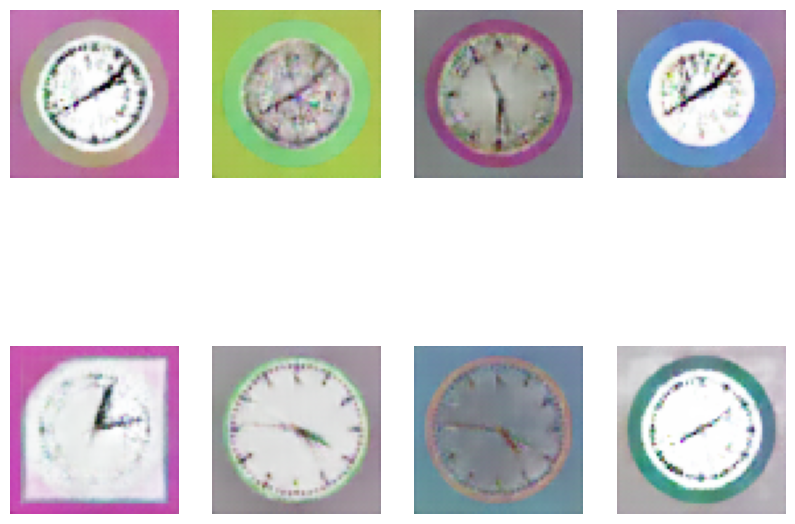

In [ ]:
z = torch.randn(8,nz,1,1,device=device)
images = netG(z)

figure = plt.figure(figsize=(10, 8))
cols, rows = 4, 2
for i in range(cols * rows):
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    img = images[i].cpu().detach().permute(1, 2, 0)
    img = torch.clamp(img, 0, 1)
    plt.imshow(img)
plt.show()





two random latent spaces are generated, then a tensor is initialized to store the interpolated vectors, then a loop is created to linearly interplorate between the latent spaces by having weights that change throughout loop iterations, making it in the middle iteration to create a blend between the two latent spaces, the interpolated latent vectors are passed to the generator to generate pictures, and the genarated 7 pictures are plotted.

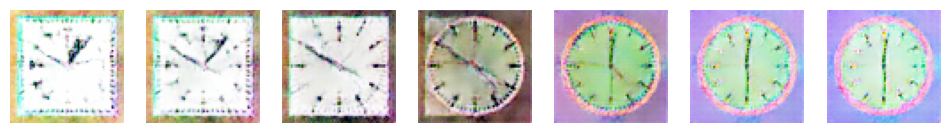

In [ ]:
nsamples = 7
z1 = torch.randn(1,nz,1,1, device = device)
z2 = torch.randn(1,nz,1,1,device = device)
z = torch.zeros(nsamples,nz,1,1,device = device)

for i in range(nsamples):
  w1 = i/(nsamples-1)
  w2 = 1 -w1
  z[i,:,:,:]= w1 * z1 + w2 * z2

images = netG(z)

figure = plt.figure(figsize =(12, 4))
for i in range(nsamples):
  figure.add_subplot(1, nsamples, i+1)
  plt.axis("off")
  img = images[i].cpu().detach().permute(1,2,0)
  img = torch.clamp(img, 0, 1)
  plt.imshow(img)
plt.show()

